# Classes 102

## Last time on classes (a recap)

* A Class encapsulate: **Behavior** and **Data**

* A Class can be seen as a "Blueprint" - for creating new **objects** in a systematic way instead of dictionary based chaos

* Class data is in attributes - and sometimes called members 



## Methods

* Class behavior is implemented with "functions" on the class. They are called methods

* A class is instatiated - creating instances.  the type of the class instance is the class

* Classes have special built in methods in python - called dunder methods - starting with double underscore. `__method__ `.

* We've met one such method: `__init__ ` which is called on every class  instantiation 

* Class methods Always receive the "instance" of the class as the first parameter to the method - by convention it's called "self"


## Inheritence revisited

In [3]:
class Person:
    def __init__(self, age, first_name, last_name):
        self.age = age
        self.name = f'{first_name} {last_name}'
    
    def greet(self):
        print(f"Howdy {self.name}")

class President(Person):
    def __init__(self, age, first_name, last_name, catch_phrase):
        self.age = age
        self.name = f'{first_name} {last_name}'
        self.catch_phrase = catch_phrase
        self.last_name = last_name
    
    def greet(self):
        print(f"Yes Sir Mr {self.last_name}")

## Introducing `super`

### What is the problem of the code above? is it DRY enough?

In [4]:
class President(Person):
    def __init__(self, age, first_name, last_name, catch_phrase):
        super().__init__(age, first_name, last_name) # What happens here?
        # now what? 
        
    
    def greet(self):
        print(f"Yes Sir Mr {self.last_name}")

### Note about super:

`Super` can get two parameters - the subclass to check and an instance of that class
```python
class President(Person):
    def __init__(self, age, first_name, last_name, catch_phrase):
        super(President, self).__init__(age, first_name, last_name) # What happens here?
        # Virtually the same as
        super().__init__()
         
```
You can do funky things with `super` fiddeling and multiple inheritance but this isn't a good practice

## Class hierarchy doesn't stop with two levels, they can be much deeper 

In [ ]:
class Mammal:
    def __init__(self, age):
        self.age = age
    
class Person(Mammal):
    def __init__(self, age, first_name, last_name):
        super().__init__(age)
        
        self.name = f'{first_name} {last_name}'

class President(Person):
    def __init__(self, age, first_name, last_name, catch_phrase):
        super().__init__(age, first_name, last_name) # What happens here?
        self.last_name = last_name
        
    def greet(self):
        print(f"Yes Sir Mr {self.last_name}")

## Using base classes as interfaces

### What is an interface actually?

An **Interface** can be understood as code defining the **contract** the class must adhere to

In [8]:
import datetime

class BaseEvent:
    def serialize(self):
        raise NotImplementedError('You should implement serialize')
        
    def time_since(self, start_time: datetime.datetime):
        raise NotImplementedError()


## Why do we need interfaces?

* Helping us to plan the code abstractly 
* "Forcing" us to implement some methods expected by the code using it
* Helping the IDE to help us - highlighting type mismatches, and missing classes

## Clearer modeling of reality using dunder methods overriding

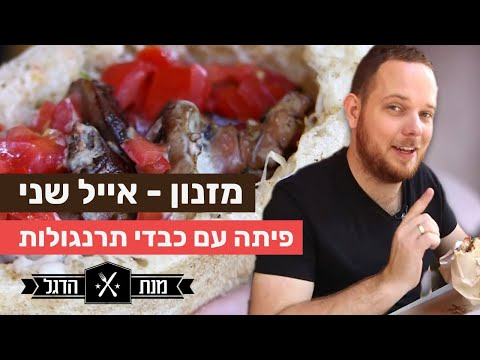

In [10]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("7CxT6ty6_bc")
# Sorry for the carnist example

In [20]:
# Consider the following class instances

class Ingredient:
    def __init__(self, name, protein: int= 0, carbs: int = 0, fats: int = 0):
        self.name = name
        self.protein = protein
        self.carbs = carbs
        self.fats = fats
        
    @property # note this notation
    def nutritional_value(self):
        return self.protein * 2 + self.carbs * 1 + self.fats * 1

tehina = Ingredient(name = 'tehina', fats = 60, carbs = 10, protein = 25)
print(tehina.nutritional_value)

120


In [ ]:
# Note Inter class interactions

Class Mana:
    is_empty = True
    ingredient_list = []
    # Note I don't have to use an __init__
    def add_ingredient(self, ingredient: Ingredient):
        pass
    
    def calculate_nutitional_value(self):
        # what need to happen here
        raise NotImplementedError()

In [21]:
# But this is a bit awkard, can we just add the ingredients?
pita = Ingredient(name = 'pita', fats = 1.2, carbs = 55, protein = 9)

result = tehina + pita

print(result)

TypeError: unsupported operand type(s) for +: 'Ingredient' and 'Ingredient'

In [22]:
# Consider the following class instances

class Ingredient:
    def __init__(self, name, protein: int= 0, carbs: int = 0, fats: int = 0):
        self.name = name
        self.protein = protein
        self.carbs = carbs
        self.fats = fats
        
    @property # note this notation
    def nutritional_value(self):
        return self.protein * 2 + self.carbs * 1 + self.fats * 1

    def __add__(self, other):
        if isinstance(other, Ingredient):
            return self.nutritional_value + other.nutritional_value
        else:
            return self.nutritional_value + other

    def __radd__(self, other):
        return self.__add__(other)

In [24]:
# And now we can do 
tehina = Ingredient(name = 'tehina', fats = 60, carbs = 10, protein = 25)

pita = Ingredient(name = 'pita', fats = 1.2, carbs = 55, protein = 9)

result = tehina + pita
print(result)

194.2


In [ ]:
# What about subtracting? other math?

##  Class methods
